## Fan structures on $\operatorname{TFl}_4^{\circ}$

In this OSCAR jupyter notebook, we study two fan structures on $\operatorname{TF\ell}_4^{\circ}$. The first one is the secondary fan $\Sigma_{\operatorname{sec}}$ whose cones parameterize the regular matroidal subdivisions of the 3-dimensional permutahedron $\Pi_4$. The second one $\Sigma_{\min}$ is a coarsening of $\Sigma_{\operatorname{sec}}$. 

In [86]:
using Oscar
using Combinatorics
pm = Polymake

Polymake

The space $\operatorname{TFl}_4^{\circ}$ lies in $\mathbb{R}^{14} \cong \wedge^1 \mathbb{R}^4 \times \wedge^2 \mathbb{R}^4 \times \wedge^3 \mathbb{R}^4$. The coordinates $f_{\lambda}$ of $\mathbb{R}^{14}$ are labeled by the proper nonempty subsets $\lambda$ of $[4]$, and we order them by

\begin{equation}
    f_1, f_2, f_3, f_4, f_{12}, f_{13}, f_{14}, f_{23}, f_{24}, f_{34}, f_{123}, f_{124}, f_{134}, f_{234}.
\end{equation}

These are recorded in the dictionary ```f```. Its keys are strings ```"i"```, ```"ij"```, ```"ijk"``` and the value is a $1\times 14$ ```Matrix{Int64}``` with a 1 in the position indicated by the ordering above, and 0's otherwise.  

In [2]:
f = Dict(
    "1" => [1 0 0 0 0 0 0 0 0 0 0 0 0 0],
    "2" => [0 1 0 0 0 0 0 0 0 0 0 0 0 0],
    "3" => [0 0 1 0 0 0 0 0 0 0 0 0 0 0],
    "4" => [0 0 0 1 0 0 0 0 0 0 0 0 0 0],
    "12" => [0 0 0 0 1 0 0 0 0 0 0 0 0 0],
    "13" => [0 0 0 0 0 1 0 0 0 0 0 0 0 0],
    "14" => [0 0 0 0 0 0 1 0 0 0 0 0 0 0],
    "23" => [0 0 0 0 0 0 0 1 0 0 0 0 0 0],
    "24" => [0 0 0 0 0 0 0 0 1 0 0 0 0 0],
    "34" => [0 0 0 0 0 0 0 0 0 1 0 0 0 0],
    "123" => [0 0 0 0 0 0 0 0 0 0 1 0 0 0],
    "124" => [0 0 0 0 0 0 0 0 0 0 0 1 0 0],
    "134" => [0 0 0 0 0 0 0 0 0 0 0 0 1 0],
    "234" => [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
);

The lineality space of $\operatorname{TFl}_4^{\circ}$ is the row span of the following ```Matrix{Int64}```.   

In [3]:
lin = vcat(
       f["1"] + f["12"] + f["13"] + f["14"] + f["123"] + f["124"] + f["134"],
       f["2"] + f["12"] + f["23"] + f["24"] + f["123"] + f["124"] + f["234"],
       f["3"] + f["13"] + f["23"] + f["34"] + f["123"] + f["134"] + f["234"],
       f["4"] + f["14"] + f["24"] + f["34"] + f["124"] + f["134"] + f["234"],
       f["1"] + f["2"] + f["3"] + f["4"],
       f["12"] + f["13"] + f["14"] + f["23"] + f["24"] + f["34"],
       f["123"] + f["124"] + f["134"] + f["234"]
    );

The group $\mathfrak{S}_2 \ltimes \mathfrak{S}_4$ acts faithfully on $\mathbb{R}^{14}$ by permuting the coordinates, and this realizes $\mathfrak{S}_2 \ltimes \mathfrak{S}_4$ as a subgroup of $\mathfrak{S}_{14}$; this is recorded as a ```Group``` named ```S2S4InS14```. This action restricts to an action on $\Sigma_{\operatorname{sec}}$ and $\Sigma_{\operatorname{min}}$. 

In [4]:
S14Gp = symmetric_group(14); 

S2S4InS14, _ = sub(S14Gp, [perm(S14Gp,[2,1,3,4,5,8,9,6,7,10,11,12,14,13]),
                           perm(S14Gp,[2,3,4,1,8,9,5,10,6,7,14,11,12,13]),
                           perm(S14Gp,[14,13,12,11,10,9,8,7,6,5,4,3,2,1])]);

Next, we record some functions that we use to study the two fan structures. 

**Function**: ```permuteCoordsCone```

*Input*: ```coneRays, linSpace = Matrix{Int64}```, ```sigma = Vector{Int64}```

*Output*: ```Cone```

*Description*: The rows of the matrix ```coneRays``` are the rays of a cone, the rows of the matrix ```linSpace``` are generators for the lineality space, and ```sigma``` is records a permutation of the columns of these matrices as a vector $(\sigma(1), \sigma(2),\ldots )$. This function returns a cone whose rays are obtained by permuting their coordinates according to $\sigma$. 

---

**Function**: ```coneFromRaysLin```

*Input*: ```coneRays, linSpace = Matrix{Int64}```

*Output*: ```Cone```

*Description*: The rows of the matrix ```coneRays``` are the rays of a cone, the rows of the matrix ```linSpace``` are generators for the lineality space. This function returns a cone with rays ```coneRays``` and lineality space ```linSpace```. 

---

**Function**: ```C1ContainedInC2```

*Input*: ```C1, C2 = Cone```

*Output*: ```Bool```

*Description*: ```C1,C2``` are two cones in the same ambient space. This function returns ```true``` if ```C1``` is contained in ```C2``` and ```false``` otherwise. 

---

**Function**: ```uniqueCones```

*Input*: ```Cs = Vector{Cone}```

*Output*: ```Vector{Cone}```

*Description*: ```Cs``` is a list of cones, and this function returns a new list of cones that removes repeated cones. 

---

**Function**: ```localLinealityDimension```

*Input*: ```Rs, Ls = Matrix{Int64}```, ```maxConesRays = Vector{Matrix{Int64}}```

*Output*: ```Int64```

*Description*: ```Rs``` and ```Ls``` are matrices whose rows record the rays and lineality space of a cone $C$, and ```maxConesRays``` are maximal cones in a fan that contain $C$. Each maximal cone in ```maxConesRays``` is recorded as a ```Matrix{Rational{Int64}}``` whose rows are the rays (the lineality space is also given by ```Ls```). This function forms linear subspaces each spanned by a maximal cone and records the dimension of their intersection. 

---




In [5]:
function permuteCoordsCone(coneRays, linSpace, sigma)
    sConesRays = coneRays[:, sigma]
    return positive_hull(vcat(sConesRays, linSpace, -linSpace ))
end

function coneFromRaysLin(coneRays, linSpace)
    return positive_hull(vcat(coneRays, linSpace, -linSpace)) 
end

function C1ContainedInC2(C1,C2)
    C12 = intersect(C1,C2)
    return C12 == C1
end

function uniqueCones(Cs)
    S = Vector{Cone}();
    for c in Cs
        if c in S
            continue
        end
        append!(S,[c])
    end
    return S
end

function localLinealityDimension(Rs, Ls, maxConesRays)
    newLin = Matrix{Rational{Int64}}(vcat(Ls, Rs)); 
    (nr,nc) = size(newLin)
    S = MatrixSpace(QQ, nr, nc)

    ker = S();
    for rs in maxConesRays
        rowSpan = vcat(newLin, rs); 
        nrows, ncols = size(rowSpan); 
        S = MatrixSpace(QQ, nrows, ncols);
                
        ker = vcat(ker,kernel(S(rowSpan))[2]')
    end
    
    return 14 - rank(ker)
end

localLinealityDimension (generic function with 1 method)

### Secondary fan structure

Next, we record the fan $\Sigma_{\operatorname{sec}}$. 

<ul>
  <li> <code>cones</code> is a <code>Vector{Matrix{Int64}}</code> recording $\mathfrak{S}_2 \ltimes \mathfrak{S}_4$-orbit representatives of the cones of $\Sigma_{\operatorname{sec}}$. </li>
  <li> <code>maxCones</code> is a <code>Vector{Cone}</code> recording all maximal cones of $\Sigma_{\operatorname{sec}}$.</li>
  <li> <code>star</code> is a <code>Dict</code> whose keys are the numbers $1,\ldots,9$ refering to the indices of<code>cones</code>, and the value <code>star[i]</code> records the maximal cones containing <code>cones[i]</code>.  </li>
   <li> <code>starConesRays</code> is a  <code>Dict</code> similar to  <code>star</code>, but each maximal cone in 
    <code>star[i]</code> is recorded as a <code>Matrix{Rational{Int64}}</code> whose rows are the rays of the maximal cone. </li>
</ul> 

In [6]:
cones = [
    f["1"],
    f["12"],
    f["1"]+f["2"]+f["12"],
    [f["1"]; f["23"]],
    [f["1"]; f["123"]],
    [f["1"]; f["234"]],
    [f["1"]; f["1"]+f["2"]+f["12"]],
    [f["12"]; f["34"]],
    [f["12"]; f["3"]+f["4"]+f["34"]],
    [f["1"]; f["23"]; f["124"]],
    [f["1"]; f["23"]; f["1"]+f["4"]+f["14"]],
    [f["1"]; f["123"]; f["1"]+f["4"]+f["14"]],
    [f["1"]; f["234"]; f["1"]+f["2"]+f["12"]],
    [f["12"]; f["34"]; f["1"]+f["2"]+f["12"]]
];

preMaxCones = vcat( [permuteCoordsCone(cones[10], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[11], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[12], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[13], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[14], lin, Vector(sigma)) for sigma in elements(S2S4InS14)])

maxCones = uniqueCones(preMaxCones);

star = Dict()
for i in 1:9
    c = coneFromRaysLin(cones[i], lin); 
    star[i] = [];
    for mc in maxCones
#        mcc = conesFromRaysLin(rays()) 
        if C1ContainedInC2(c,mc)
            append!(star[i], [mc])
        end
    end
end


starConesRays = Dict()
for i in 1:9
    starConesRays[i] = [Matrix{Rational{Int64}}(rays(mc).Obj.RAYS)  for mc in star[i]]
end


## Matroidal subdivisions

In [95]:
function permutahedron(n)
    return orbit_polytope(1:n, symmetric_group(n))
end

function invertPerm(p)
    n=length(p)
    pd = Dict{Int64,Int64}(i=>p[i] for i in 1:n)
    pdinv = Dict{Int64,Int64}(value=>key for (key,value) in pd)
    [pdinv[i] for i in 1:n]
end


function permutation2Flag(p)
    n=length(p)
    irp = reverse(invertPerm(p))
    return [ sort([irp[i] for i in 1:d]) for d in 1:(n-1)]
end

function flag2Permutation(flag)    
    n = length(flag) + 1
    p1 = pop!([r for r in f[1]])
    p = [p1]
    for k in 2:(n-1)
        pk = pop!([r for r in setdiff(flag[k], flag[k-1])])
        append!(p,[pk]); 
    end
    pn = pop!([r for r in setdiff(Set(1:n), flag[n-1])])
    append!(p,[pn])

    return fill((n+1),(1,n))[1,:] - invertPerm(p)
end



function plueckerVector2Dict(plueckerVector, n)
    subsets = []
    for d in 1:(n-1)
        append!(subsets,collect(powerset([1:n;], d, d))); 
    end
    dPl = Dict{Vector{Int64}, Int64}()
    for i in 1:length(subsets)
        dPl[subsets[i]] = plueckerVector[i];
    end
    
    return dPl
end


function pluecker2Permutahedron(plueckerVector, n)
    pvD = plueckerVector2Dict(plueckerVector, n);
    newDict = Dict{Vector{Int64}, Int64}()
    
    Pn = permutahedron(n)
    #vperm_n = vertices(permutahedron(n)); 
    vperm_n = [[Int64(Rational(i)) for i in p] for p in vertices(Pn)];
    
    for p in vperm_n
        vp = Vector{Int64}(p);
        f = permutation2Flag(vp)
        newDict[vp] = sum([pvD[k] for k in f])
    end
    
    return newDict

end

function subdPermutahedron(plueckerVector, n)
    Pn = permutahedron(n); 
    D = pluecker2Permutahedron(plueckerVector, n); 
    
    #vperm_n = [Vector{Int64}(p) for p in vertices(Pn)]
    vperm_n = [[Int64(Rational(i)) for i in p] for p in vertices(Pn)]; 
    
    
    matrixVerticesPn = [vperm_n[i][j] for i in 1:length(vperm_n), j in 1:n]
    wPerm = [D[vperm_n[i]] for i in 1:length(vperm_n)]
    return SubdivisionOfPoints(matrixVerticesPn, wPerm)
end

function vertices2Bases(vs, n)
    Bs = Set([])
    nrows,ncols = size(vs)
    
    for i in 1:nrows
        union!(Bs, permutation2Flag(vs[i,:]))
    end
    return Bs    
end


function subd2BasesMaxCells(subd, n)
    vs =  Matrix{Int64}(subd.pm_subdivision.POINTS)[:,2:n+1]; 
    mcs = subd.pm_subdivision.MAXIMAL_CELLS
    nMaxCells = subd.pm_subdivision.N_MAXIMAL_CELLS; 
    
    mcsPerm = [ vs[[i for i in 1:factorial(n) if mcs[j,:][i]], :] for j in 1:nMaxCells ] 
    
    return Dict{Int64, Vector{Vector{Int64}}}(i => set2Array(vertices2Bases(mcsPerm[i],n)) for i in 1:nMaxCells);
end

function sumRows(M)
    nrows,ncols = size(M)
    rM = [M[i,:] for i in 1:nrows  ]
    return(sum(rM))
end

function set2Array(S)
    arr = []
    for i in S
        append!(arr,[i])
    end
    return sort!(arr, by = x->(length(x),x))
end

set2Array (generic function with 1 method)

**Function**: ```permutahedron```

*Input*: ```n = Int64```

*Output*: ```Polytope```

*Description*: returns the degree $n$ permutahedron, i.e., the $\mathfrak{S}_n$ orbit of $(1,2,,\ldots,n)$. 

---

**Function**: ```invertPerm```

*Input*: ```sigma = Vector{Int64}```

*Output*: ```Vector{Int64}```

*Description*: given a permutation $\sigma\in \mathfrak{S}_n$ as the vector $(\sigma(1), \sigma(2), \ldots,\sigma(n))$, this function returns $(\sigma^{-1}(1), \sigma^{-1}(2), \ldots, \sigma^{-1}(n))$.

---

**Function**: ```permutation2Flag```

*Input*: ```sigma = Vector{Int64}```

*Output*: ```Vector{Vector{Int64}}```

*Description*: given a permutation $\sigma\in \mathfrak{S}_n$ as the vector $(\sigma(1), \sigma(2), \ldots,\sigma(n))$, this function returns the corresponding complete flag $\emptyset = F_0 \subset F_1 \subset F_2 \subset \cdots \subset F_{n-1} \subset F_{n} = [n]$ where $|F_{k}| = k$ and $F_{n-k+1} \setminus F_{n-k} = \{\sigma^{-1}(k)\}$.

For example, the permutation $\sigma = (4,1,3,2)$ corresponds to the flag $\{1\} \subset \{1,3\} \subset \{1,3,4\}$. 

---

**Function**: ```flag2Permutation```

*Input*: ```flag = Vector{Vector{Int64}}```

*Output*: ```Vector{Int64}```

*Description*: given a complete flag $\emptyset = F_0 \subset F_1 \subset F_2 \subset \cdots \subset F_{n-1} \subset F_{n} = [n]$, this function returns a permutation $\sigma$ satisfying $F_{n-k+1} \setminus F_{n-k} = \{\sigma^{-1}(k)\}$; it returns $\sigma$ as the vector $(\sigma(1),\ldots,\sigma(n))$. 

For example, the flag $\{1\} \subset \{1,3\} \subset \{1,3,4\}$ maps to the permutation $\sigma = (4,1,3,2)$. 

---

**Function**: ```plueckerVector2Dict```

*Input*: ```plueckerVector = Vector{Int64}, n = Int64```

*Output*: ```Dict{Vector{Int64}, Int64}```

*Description*: ```plueckerVector``` is a vector of Pluecker coordinates in the multiprojective space $\prod_{d=1}^n \mathbb{P}(\wedge^d\mathbb{C}^n)$ where the coordinates are indexed by the nonempty proper subsets of $[n]$, ordered first by size, then lexicographically. This function returns a dictionary where the keys are the nonempty proper subsets of $[n]$ (as ```Vector{Int64}```) and the value on a subset it the corresponding value of ```plueckerVector```. 

For example, the vector $(1,2,3,4,5,6,7,8,9,10,11,12,13,14)$ in $\mathbb{P}(\wedge^1\mathbb{C}^4) \times \mathbb{P}(\wedge^2\mathbb{C}^4) \times \mathbb{P}(\wedge^3\mathbb{C}^4)$ corresponds to the dictionary ```[1] => 1, [2] => 2, [3] => 3, [4] => 4, [1,2] => 5, [1,3] => 6, [1,4] => 7, [2,3] => 8, [2,4] => 9, [3,4] => 10, [1,2,3] => 11, [1,2,4] => 12, [1,3,4] => 13, [2,3,4] => 14```. 

---

**Function**: ```pluecker2Permutahedron```

*Input*: ```plueckerVector = Vector{Int64}, n = Int64```

*Output*: ```Dict{Vector{Int64}, Int64}```

*Description*: ```plueckerVector``` is a vector $(w_1,\ldots,w_{n-1})$ of Pluecker coordinates in the multiprojective space $\prod_{d=1}^n \mathbb{P}(\wedge^d\mathbb{C}^n)$ where the coordinates are indexed by the nonempty proper subsets of $[n]$, ordered first by size, then lexicographically, see ```plueckerVector2Dict``` above. This function returns a weight vector $w$ on the vertices of the permutahedron $\Pi_n$ in such a way that the subdivision $\operatorname{subd}_w\Pi_n$ is the mixed subdivision of $\Delta(1,n) + \cdots + \Delta(n-1,n)$ corresponding to $(w_1,\ldots,w_{n-1})$. Here, $w$ is recorded as a ```Dict{Vector{Int64}, Int64}``` where the keys are the permutations of $[n]$. 

For example, the vector $(1,2,3,4,5,6,7,8,9,10,11,12,13,14)$ in $\mathbb{P}(\wedge^1\mathbb{C}^4) \times \mathbb{P}(\wedge^2\mathbb{C}^4) \times \mathbb{P}(\wedge^3\mathbb{C}^4)$ corresponds to the dictionary ```[1] => 1, [2] => 2, [3] => 3, [4] => 4, [1,2] => 5, [1,3] => 6, [1,4] => 7, [2,3] => 8, [2,4] => 9, [3,4] => 10, [1,2,3] => 11, [1,2,4] => 12, [1,3,4] => 13, [2,3,4] => 14``` as above. The vector $w$ is a dictionary where, e.g., ```[4,3,2,1] => 17``` ($= w_1 + w_{12} + w_{123}$, note the shift by 1).   

---

**Function**: ```subdPermutahedron```

*Input*: ```plueckerVector = Vector{Int64}, n = Int64```

*Output*: ```Subdivision```

*Description*: ```plueckerVector``` is a vector $(w_1,\ldots,w_{n-1})$ of Pluecker coordinates in the multiprojective space $\prod_{d=1}^n \mathbb{P}(\wedge^d\mathbb{C}^n)$ where the coordinates are indexed by the nonempty proper subsets of $[n]$, ordered first by size, then lexicographically, see ```plueckerVector2Dict``` above. This function returns the corresponding mixed subdivision of $\Pi_n = \Delta(1,n) + \cdots + \Delta(n-1,n)$.

---

**Function**: ```vertices2Bases```

*Input*: ```vs = Matrix{Int64}, n = Int64```

*Output*: ```Set```

*Description*: ```vs``` is a matrix with $n$ columns whose rows are vertices of a subpermutahedron of $\Pi_n$. This function returns the bases of the corresponding flag matroid. 

---

**Function**: ```subd2BasesMaxCells```

*Input*: ```subd = Subdivision, n = Int64```

*Output*: ```Dict{Int64, Vector{Vector{Int64}}}```

*Description*: ```subd``` is a matroidal subdivision of $\Pi_n$. This function returns the flag matroids of the top-dimensional cells where each flag matroid is expressed as a list of its bases. 

---

**Function**: ```sumRows```

*Input*: ```M = Matrix{Int64}```

*Output*: ```Vector{Int64}```

*Description*: This function returns the sum of the rows of the matrix ```M```. 

---

**Function**: ```set2Array```

*Input*: ```S=Set```

*Output*: ```Vector{Vector{Int64}}```

*Description*: ```S``` is a set of ```Vector{Int64}```'s, this function returns this data as a list ordered first with respect to size, then lexicographically. 



In [96]:
subdPermutahedron(sumRows(cones[1]), 4)

A subdivision of points in ambient dimension 4

In [97]:
subd = [subdPermutahedron(sumRows(cones[i]), 4) for i in 1:length(cones)];
maxCells = [subd2BasesMaxCells(subd[i],4) for i in 1:length(cones)];
graphs = [subd[i].pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH  for i in 1:length(cones)];

In [92]:
d=1
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end


#pm.visual(graphs[d])

0: [[1], [2], [3], [4], [1, 2], [1, 3], [1, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4]]
1: [[2], [3], [4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


0: [[1], [2], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [1, 2, 3], [1, 2, 4]]
1: [[1], [2], [3], [4], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


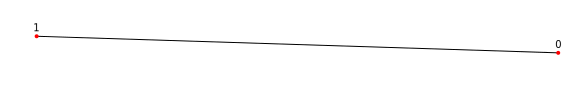

In [93]:
d=2
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

0: [[1], [2], [3], [4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [1, 2, 3], [1, 2, 4]]
1: [[1], [3], [4], [1, 3], [1, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4]]
2: [[2], [3], [4], [2, 3], [2, 4], [1, 2, 3], [1, 2, 4], [2, 3, 4]]
3: [[3], [4], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]]


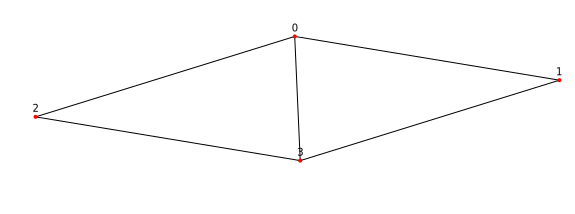

In [94]:
d=3
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=4
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=5
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=6
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=7
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=8
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=9
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=10
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=11
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=12
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=13
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

In [ ]:
d=14
for i in 1:length(keys(maxCells[d]))
    print(i-1); print(": "); print(maxCells[d][i]); print("\n")
end

pm.visual(graphs[d])

## Coarsest fan structure

In $\Sigma_{\operatorname{sec}}$, the maximal cones $\mathbb{R}_{\geq 0} \langle f_{12}, f_{34}, f_{1} + f_{2} + f_{12} \rangle + L_{\mathbb{R}}$ and $\mathbb{R}_{\geq 0} \langle f_{12}, f_{34}, f_{3} + f_{4} + f_{34} \rangle + L_{\mathbb{R}}$ glue along $\mathbb{R}_{\geq 0} \langle f_{12}, f_{34} \rangle + L_{\mathbb{R}}$ to form a larger convex cone. This happens for 2 other pairs of cones (corresponding to the other 2 partitions $(13,24)$ and $(14,23)$ of $[4]$). This produces a new fan supported on $\operatorname{TFl}_4^{\circ}$ called $\Sigma_{\operatorname{min}}$. 

In [ ]:
cones = [
    f["1"],
    f["12"],
    f["1"]+f["2"]+f["12"],
    [f["1"]; f["23"]],
    [f["1"]; f["123"]],
    [f["1"]; f["234"]],
    [f["1"]; f["1"]+f["2"]+f["12"]],
    [f["12"]; f["3"]+f["4"]+f["34"]],
    [f["1"]; f["23"]; f["124"]],
    [f["1"]; f["23"]; f["1"]+f["4"]+f["14"]],
    [f["1"]; f["123"]; f["1"]+f["4"]+f["14"]],
    [f["1"]; f["234"]; f["1"]+f["2"]+f["12"]],
    [f["12"]; f["34"]; f["1"]+f["2"]+f["12"]; f["3"] + f["4"] + f["34"]]];


preMaxCones = vcat( [permuteCoordsCone(cones[9],  lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[10], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[11], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[12], lin, Vector(sigma)) for sigma in elements(S2S4InS14)],
                    [permuteCoordsCone(cones[13], lin, Vector(sigma)) for sigma in elements(S2S4InS14)])

maxCones = uniqueCones(preMaxCones);

star = Dict()
for i in 1:9
    c = coneFromRaysLin(cones[i], lin); 
    star[i] = [];
    for mc in maxCones
#        mcc = conesFromRaysLin(rays()) 
        if C1ContainedInC2(c,mc)
            append!(star[i], [mc])
        end
    end
end


starConesRays = Dict()
for i in 1:9
    starConesRays[i] = [Matrix{Rational{Int64}}(rays(mc).Obj.RAYS)  for mc in star[i]]
end
    


In [ ]:
all([localLinealityDimension(cones[1], lin, starConesRays[1]) == 7,
localLinealityDimension(cones[2], lin, starConesRays[2]) == 7,
localLinealityDimension(cones[3], lin, starConesRays[3]) == 7,
localLinealityDimension(cones[4], lin, starConesRays[4]) == 8,
localLinealityDimension(cones[5], lin, starConesRays[5]) == 8,
localLinealityDimension(cones[6], lin, starConesRays[6]) == 8,
localLinealityDimension(cones[7], lin, starConesRays[7]) == 8,
localLinealityDimension(cones[8], lin, starConesRays[8]) == 8])